# Comparing methods for a simple ODE

## Exercise 1

Use Euler's Method to solve for $x(t)$ given
$$ \frac{\text d x}{\text d t} = -x^3(t) + \sin(t) $$
from 0 to 10 seconds, with initial condition $x(t=0) = 0$.

Try with 20 time-steps, and again with 1000 time-steps. Plot the results, on the same graph.

In [111]:
import numpy as np
import matplotlib.pyplot as plt

def dx_dt(x, t):
    return -x**3 + np.sin(t)


In [112]:
def eulers_method(x0, steps):
    t_vals = np.linspace(0, 10, steps)
    x_vals = np.zeros(steps)
    h = 10 / (steps - 1)

    x_vals[0] = x0

    for i in range(1, steps):
        x_vals[i] = x_vals[i-1] + h * dx_dt(x_vals[i-1], t_vals[i-1])

    return t_vals, x_vals

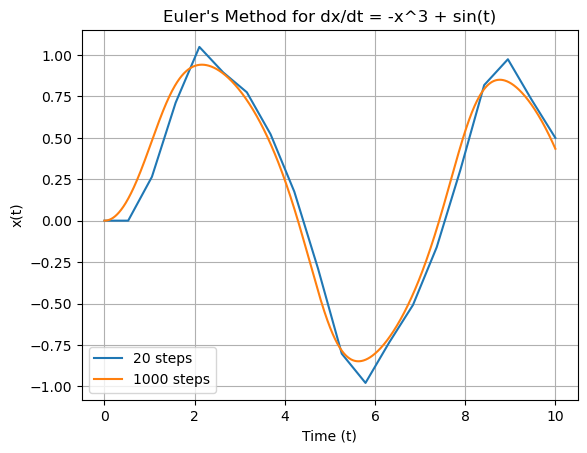

In [113]:
x0 = 0   # Initial condition x(0) = 0

t_20, x_20 = eulers_method(x0, 20)
t_1000, x_1000 = eulers_method(x0, 1000)

plt.plot(t_20, x_20, label="20 steps")
plt.plot(t_1000, x_1000, label="1000 steps")
plt.xlabel("Time (t)")
plt.ylabel("x(t)")
plt.title("Euler's Method for dx/dt = -x^3 + sin(t)")
plt.legend()
plt.grid(True)

## Exercise 2

Repeat Exercise 1 using RK2.

In [114]:
def rk_two(x0, steps):
    t_vals = np.linspace(0, 10, steps)
    x_vals = np.zeros(steps)
    h = 10 / (steps - 1)

    x_vals[0] = x0

    for i in range(1, steps):
        k1 = dx_dt(x_vals[i-1], t_vals[i-1])
        k2 = dx_dt(x_vals[i-1] + h/2 * k1, t_vals[i-1] + h/2)
        x_vals[i] = x_vals[i-1] + h * k2

    return t_vals, x_vals

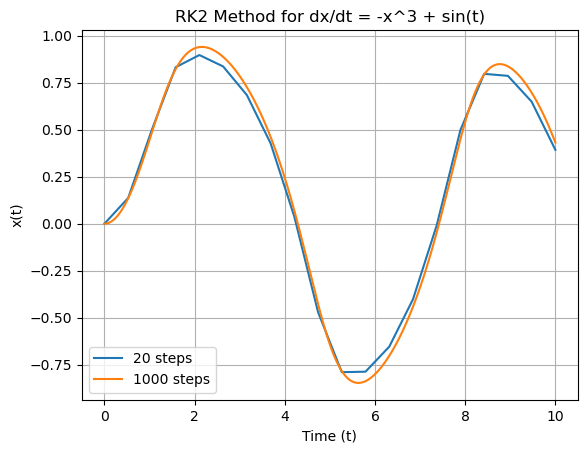

In [115]:
t_20, x_20_rk2 = rk_two(x0, 20)
t_1000, x_1000_rk2 = rk_two(x0, 1000)

plt.plot(t_20, x_20_rk2, label="20 steps")
plt.plot(t_1000, x_1000_rk2, label="1000 steps")
plt.xlabel("Time (t)")
plt.ylabel("x(t)")
plt.title("RK2 Method for dx/dt = -x^3 + sin(t)")
plt.legend()
plt.grid(True)

## Exercise 3

Repeat Exercise 1 using RK4.

In [116]:
def rk_four(x0, steps):
    t_vals = np.linspace(0, 10, steps)
    x_vals = np.zeros(steps)
    h = 10 / (steps - 1)

    x_vals[0] = x0

    for i in range(1, steps):
        k1 = dx_dt(x_vals[i-1], t_vals[i-1])
        k2 = dx_dt(x_vals[i-1] + h/2 * k1, t_vals[i-1] + h/2)
        k3 = dx_dt(x_vals[i-1] + h/2 * k2, t_vals[i-1] + h/2)
        k4 = dx_dt(x_vals[i-1] + h * k3, t_vals[i-1] + h)
        x_vals[i] = x_vals[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)

    return t_vals, x_vals

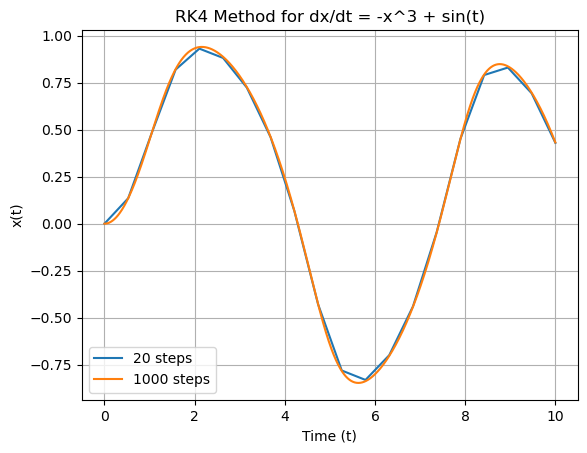

In [117]:
t_20, x_20_rk4 = rk_four(x0, 20)
t_1000, x_1000_rk4 = rk_four(x0, 1000)

plt.plot(t_20, x_20_rk4, label="20 steps")
plt.plot(t_1000, x_1000_rk4, label="1000 steps")
plt.xlabel("Time (t)")
plt.ylabel("x(t)")
plt.title("RK4 Method for dx/dt = -x^3 + sin(t)")
plt.legend()
plt.grid(True)

## Exercise 4

Repeat Exercise 1 using Bulirsch-Stoer, with error tolerance 1e-08. You may copy-and-paste code from the textbook's 'bulirsch.py' to help you.

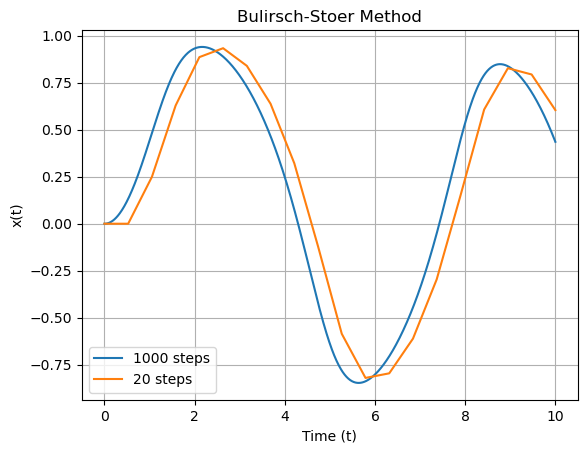

In [118]:
from math import sin
import numpy as np
from matplotlib import pyplot as plt

delta = 1e-8
x0 = 0

def H(a, b, n):
    return (b - a) / n

def dx_dt(x, t):
    return -x**3 + np.sin(t)

# Bulirsch-Stoer method implementation
def BulirschStoer(tpoints, H, delta):
    xpoints = []
    x = x0  # Initial condition
    
    for t in tpoints:  # Do the "big steps" of size H
        xpoints.append(x)
        n = 1
        
        # Do one modified midpoint step to get things started
        x1 = x + 0.5 * H * dx_dt(x, t)
        x2 = x + H * dx_dt(x1, t)
        error = 2 * H * delta  # Start with a large error
        
        # Now increase n until the required accuracy is reached
        while error > H * delta:
            n += 1
            h = H / n  # Sub-step size
            
            # Modified midpoint method (MMP)
            x1 = x + 0.5 * h * dx_dt(x, t)
            x2 = x + h * dx_dt(x1, t)
            
            for i in range(n-1):
                x1 += h * dx_dt(x2, t)
                x2 += h * dx_dt(x1, t)
            
            # Extrapolation estimates: Arrays R1, R2 hold two most recent rows
            R1 = np.empty(n)
            R1[0] = 0.5 * (x1 + x2 + 0.5 * h * dx_dt(x2, t))
            R2 = R1.copy()
            
            for m in range(1, n):
                epsilon = (R1[m-1] - R2[m-1]) / ((n/(n-1))**(2*m) - 1)
                R1[m] = R1[m-1] + epsilon
            
            error = abs(epsilon)  # Convergence criterion
        
        x = R1[n-1]  # Our most accurate estimate before going to the next step
    
    return xpoints


tpoints_20 = np.linspace(0, 10, 20)
tpoints_1000 = np.linspace(0, 10, 1000)

B20 = BulirschStoer(tpoints_20, H(0, 10, 20), delta)
B1000 = BulirschStoer(tpoints_1000, H(0, 10, 1000), delta)

plt.plot(tpoints_1000, B1000, label="1000 steps")
plt.plot(tpoints_20, B20, label="20 steps")
plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.title('Bulirsch-Stoer Method')
plt.legend()
plt.grid(True)

## Exercise 5

Repeat Exercise 1 using scipy.integrate.odeint

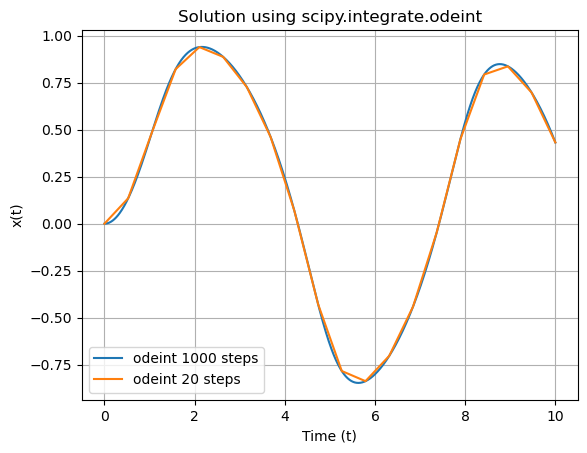

In [119]:
from scipy.integrate import odeint

odeint_20 = odeint(dx_dt, x0, tpoints_20)
odeint_1000 = odeint(dx_dt, x0, tpoints_1000)

plt.plot(tpoints_1000, odeint_1000, label="odeint 1000 steps")
plt.plot(tpoints_20, odeint_20, label="odeint 20 steps")
plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.title('Solution using scipy.integrate.odeint')
plt.legend()
plt.grid(True)

## Exercise 6

Plot your Exercise 1 through 5 results for $N=20$, on the same graph.

Plot your Exercise 1 through 5 results for $N=1000$, on the same graph. 

(So you should have 2 graphs for this exercise.)

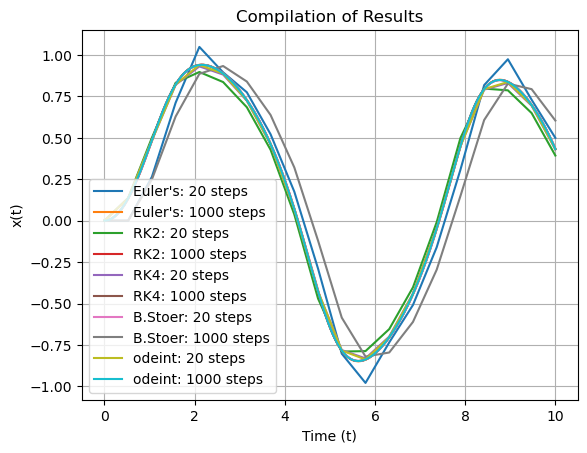

In [120]:
x0 = 0   # Initial condition x(0) = 0

t_20, x_20 = eulers_method(x0, 20)
t_1000, x_1000 = eulers_method(x0, 1000)
plt.figure()

# Exercise 1
plt.plot(t_20, x_20, label="Euler's: 20 steps")
plt.plot(t_1000, x_1000, label="Euler's: 1000 steps")

# Exercise 2
plt.plot(t_20, x_20_rk2, label="RK2: 20 steps")
plt.plot(t_1000, x_1000_rk2, label="RK2: 1000 steps")

# Exercise 3
plt.plot(t_20, x_20_rk4, label="RK4: 20 steps")
plt.plot(t_1000, x_1000_rk4, label="RK4: 1000 steps")

# Exercise 4
plt.plot(tpoints_1000, B1000, label="B.Stoer: 20 steps")
plt.plot(tpoints_20, B20, label="B.Stoer: 1000 steps")

# Exercise 5
plt.plot(tpoints_20, odeint_20, label="odeint: 20 steps")
plt.plot(tpoints_1000, odeint_1000, label="odeint: 1000 steps")

plt.xlabel("Time (t)")
plt.ylabel("x(t)")
plt.title("Compilation of Results")
plt.legend()
plt.grid(True)

# Stability of ODE Solutions

* We have focused on accuracy and speed in investigating our solutions to ODEs.
* But stability is also important!
* The stability of solutions tells us how fast initially close solutions diverge from each other.
* In other words, a stable solution tends to a finite number.
* Some systems are inherently unstable and so will always be challenging to simulate. Physical stability or instability of a system can be determined from small perturbations to a solution of the ODE.
* But even for physically stable systems, numerical methods can be unstable (i.e. give approximation and roundoff errors that grow).

## Exercise 7

Consider: $y'(t) = -2.3y(t), y(t=0) = 1$

The analytical solution is:
$y(t) = \exp (-2.3 t)$ . This is a stable solution, i.e. it tends to a finite number: $y \rightarrow 0$ as $t \rightarrow \infty$

Demonstrate (by making 2 plots) that computationally, the Euler method for the interval $0 < t < 20$ is stable for $h=0.7$ but unstable for $h=1$.

In [121]:
def y(t):
    return np.exp(-2.3 * t)

def y_prime(t):
    return -(2.3) * y(t)

def eulers_method_y(y0, t_vals, h):
    y_vals = np.zeros(len(t_vals))
    y_vals[0] = y0
    
    for i in range(1, len(t_vals)):
        y_vals[i] = y_vals[i-1] + h * (-2.3 * y_vals[i-1])
    
    return y_vals

y0 = 1
t_vals_h07 = np.arange(0, 20, 0.7)
t_vals_h1 = np.arange(0, 20, 1)

# Analytical
t_analytical = np.linspace(0, 20, 1000)
y_analytical = y(t_analytical)

# Euler's Method
y_h07 = eulers_method_y(y0, t_vals_h07, 0.7)
y_h1 = eulers_method_y(y0, t_vals_h1, 1)

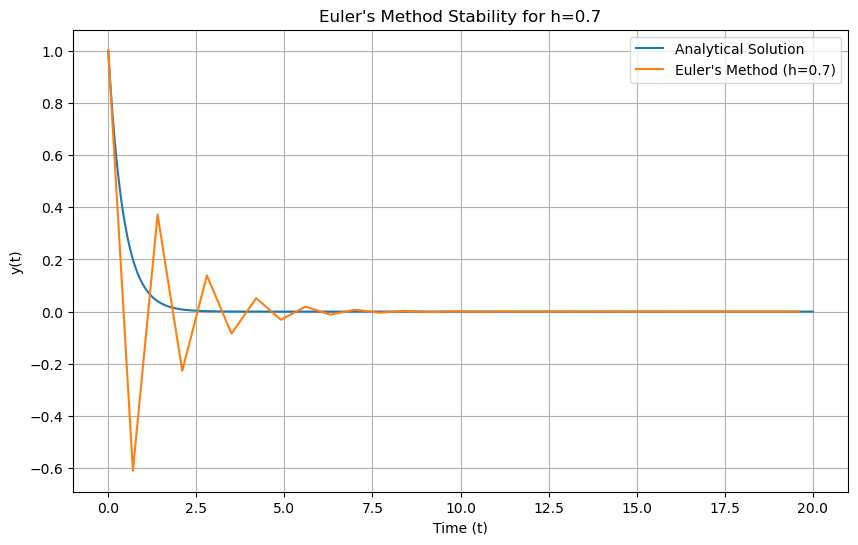

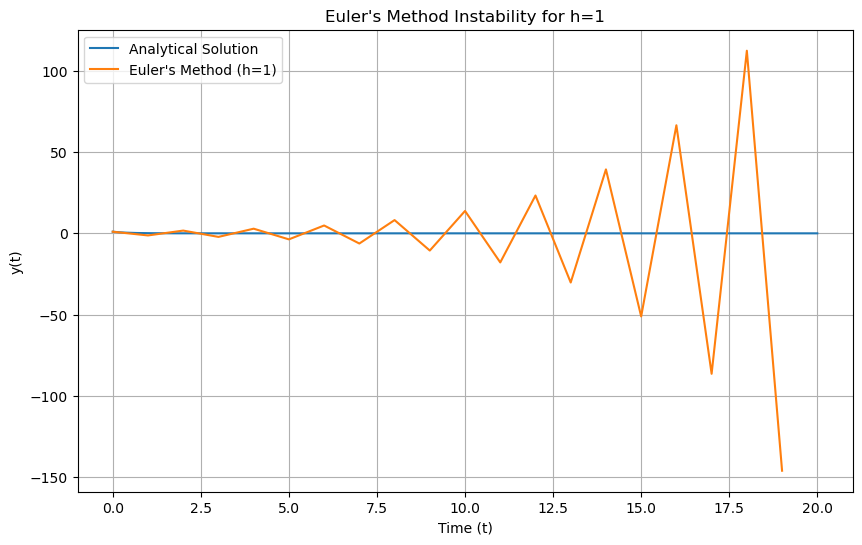

In [122]:
# h=0.7 (stable)
plt.figure(figsize=(10, 6))
plt.plot(t_analytical, y_analytical, label="Analytical Solution")
plt.plot(t_vals_h07, y_h07, label="Euler's Method (h=0.7)")
plt.xlabel("Time (t)")
plt.ylabel("y(t)")
plt.title("Euler's Method Stability for h=0.7")
plt.legend()
plt.grid(True)

# h=1 (unstable)
plt.figure(figsize=(10, 6))
plt.plot(t_analytical, y_analytical, label="Analytical Solution")
plt.plot(t_vals_h1, y_h1, label="Euler's Method (h=1)")
plt.xlabel("Time (t)")
plt.ylabel("y(t)")
plt.title("Euler's Method Instability for h=1")
plt.legend()
plt.grid(True)